Norway: https://fred.stlouisfed.org/series/CP0220NOM086NEST
Spain: https://fred.stlouisfed.org/series/CP0220ESM086NEST

You have only 2 clusters (Norway, Spain).
Cluster-robust standard errors rely on asymptotic theory (many clusters), so with only 2 clusters, they are not reliable.
Options:
Acknowledge limitation:
Report clustered SEs but state that the number of clusters is too small for reliable inference.
Wild cluster bootstrap:
In principle, you could use a wild cluster bootstrap (Cameron, Gelbach, Miller 2008), which performs better with few clusters — but this is not built into statsmodels yet (some custom implementations exist).
Visual robustness check:
Plot pre/post trends to show the effect visually, since inference is weak with 2 clusters.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df_no = pd.read_excel("data_washed/norway_smokers.xlsx").drop(columns=["Unnamed: 0"])
df_no = df_no.rename(columns={"Unnamed: 2": "Year", "Unnamed: 3": "smokers_percentage"})
df_no["Year"] = pd.to_numeric(df_no["Year"], errors="coerce")
df_no = df_no.dropna(subset=["Year", "smokers_percentage"]).reset_index(drop=True)
df_no["Year"] = df_no["Year"].astype(int)
df_no



FileNotFoundError: [Errno 2] No such file or directory: 'data_washed/norway_smokers.xlsx'

In [ ]:
df_no

NameError: name 'df_no' is not defined

In [64]:
data_sp = {
    # '1978': 41.0,
    # '1987': 39.5,
    # '1993': 37.0,
    '1997': 36.0,
    '2001': 34.5,
    '2006': 29.5,
    '2009': 27.0,
    '2011': 24.5,
    '2014': 23.0,
    '2017': 21.5,
    '2020': 18.0
}

# interpolated
data_sp = {
    '1997': 36.0, 
    '1998': 35.62, 
    '1999': 35.25, 
    '2000': 34.88, 
    '2001': 34.5, 
    '2002': 33.5, 
    '2003': 32.5, 
    '2004': 31.5, 
    '2005': 30.5, 
    '2006': 29.5, 
    '2007': 28.67, 
    '2008': 27.83, 
    '2009': 27.0, 
    '2010': 25.75, 
    # '2011': 24.5, 
    # '2012': 24.0, 
    # '2013': 23.5, 
    # '2014': 23.0, 
    # '2015': 22.5, 
    # '2016': 22.0, 
    # '2017': 21.5, 
    # '2018': 20.33, 
    # '2019': 19.17, 
    # '2020': 18.0
}

In [65]:
df_sp = pd.Series(data_sp, name='smokers_percentage')
df_sp.index.name = 'Year'

# if you need a DataFrame (columns "Year" and "smokers_percentage"):
df_sp = df_sp.reset_index()
df_sp

,Year,smokers_percentage
0,1997,36.00
1,1998,35.62
2,1999,35.25
3,2000,34.88
4,2001,34.50
5,2002,33.50
6,2003,32.50
7,2004,31.50
8,2005,30.50
9,2006,29.50


In [66]:
df_sp['Year'] = pd.to_numeric(df_sp['Year'], errors='coerce')
df_no['Year']  = pd.to_numeric(df_no['Year'],  errors='coerce')

# drop rows with invalid Year (if any) and cast to int for exact matching
df_sp = df_sp.dropna(subset=['Year']).copy()
df_no  = df_no.dropna(subset=['Year']).copy()
df_sp['Year'] = df_sp['Year'].astype(int)
df_no['Year']  = df_no['Year'].astype(int)

# optional quick check
print(df_sp['Year'].dtype, df_no['Year'].dtype)
# ...existing code...
df_merged = df_sp.merge(df_no, how="left", on="Year", suffixes=("_sp", "_no"))
df_merged

int64 int64


,Year,smokers_percentage_sp,smokers_percentage_no
0,1997,36.00,34.0
1,1998,35.62,33.0
2,1999,35.25,31.0
3,2000,34.88,31.0
4,2001,34.50,29.0
5,2002,33.50,29.0
6,2003,32.50,26.0
7,2004,31.50,26.0
8,2005,30.50,25.0
9,2006,29.50,23.0


In [67]:
df = df_merged.head(14)
df

,Year,smokers_percentage_sp,smokers_percentage_no
0,1997,36.00,34.0
1,1998,35.62,33.0
2,1999,35.25,31.0
3,2000,34.88,31.0
4,2001,34.50,29.0
5,2002,33.50,29.0
6,2003,32.50,26.0
7,2004,31.50,26.0
8,2005,30.50,25.0
9,2006,29.50,23.0


In [68]:
data_tobakk_sp = {
    '1997': 30,
    '2001': 38,
    '2006': 50,
    '2009': 60,
    '2011': 80,
    '2014': 98,
    '2017': 100,
    '2020': 108
}

data_tobakk_no ={
    '1997': 30,
    '2001': 45,
    '2006': 65,
    '2009': 80,
    '2011': 90,
    '2014': 100,
    '2017': 110,
    '2020': 120
}

# Spain HICP-T Interpolated Data
data_tobakk_sp = {
    '1997': 30.0, '1998': 32.0, '1999': 34.0, '2000': 36.0, '2001': 38.0, 
    '2002': 40.4, '2003': 42.8, '2004': 45.2, '2005': 47.6, '2006': 50.0, 
    '2007': 53.33, '2008': 56.67, '2009': 60.0, '2010': 70.0
    # , '2011': 80.0, 
    # '2012': 86.0, '2013': 92.0, '2014': 98.0, '2015': 98.67, '2016': 99.33, 
    # '2017': 100.0, '2018': 102.67, '2019': 105.33, '2020': 108.0
}

# Norway HICP-T Interpolated Data
data_tobakk_no = {
    '1997': 30.0, '1998': 33.75, '1999': 37.5, '2000': 41.25, '2001': 45.0, 
    '2002': 49.0, '2003': 53.0, '2004': 57.0, '2005': 61.0, '2006': 65.0, 
    '2007': 70.0, '2008': 75.0, '2009': 80.0, '2010': 85.0
    # , '2011': 90.0, 
    # '2012': 93.33, '2013': 96.67, '2014': 100.0, '2015': 103.33, '2016': 106.67, 
    # '2017': 110.0, '2018': 113.33, '2019': 116.67, '2020': 120.0
}

In [69]:

# ...existing code...
# Prepare long panel for DiD using the merged data (df_merged)
# create separate country-year rows from the merged wide frame
df_sp_long = df[['Year', 'smokers_percentage_sp']].rename(
    columns={'smokers_percentage_sp': 'smokers_percentage'}
).assign(Country='Spain')

df_no_long = df[['Year', 'smokers_percentage_no']].rename(
    columns={'smokers_percentage_no': 'smokers_percentage'}
).assign(Country='Norway')

df_long = pd.concat([df_sp_long, df_no_long], ignore_index=True)

# clean and types
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['smokers_percentage'] = pd.to_numeric(df_long['smokers_percentage'], errors='coerce')
df_long = df_long.dropna(subset=['Year', 'smokers_percentage']).reset_index(drop=True)

# DiD variables: Norway indicator, Post2004, and interaction (Treated)
df_long['Norway'] = (df_long['Country'] == 'Norway').astype(int)
df_long['Post2004'] = (df_long['Year'] >= 2004).astype(int)
df_long['Treated'] = df_long['Norway'] * df_long['Post2004']

# Parallel-trends checks restricted to pre-2004 period
pre = df_long[df_long['Year'] < 2004].copy()
pre = pre.sort_values(['Country','Year']).reset_index(drop=True)
pre['Norway'] = (pre['Country'] == 'Norway').astype(int)

# A) Linear-trend test: smokers ~ Year + Norway + Norway×Year
pre['Year_ct'] = pre['Year'] - pre['Year'].mean()   # center year to avoid collinearity
pre['Norway_x_Year'] = pre['Norway'] * pre['Year_ct']

X_lin = sm.add_constant(pre[['Year_ct', 'Norway', 'Norway_x_Year']])
y_lin = pre['smokers_percentage'].astype(float)
lin_model = sm.OLS(y_lin, X_lin).fit(cov_type='HC1')

print("Linear-trend interaction test (pre-2004):")
print(lin_model.summary())
print(f"Norway × Year coef = {lin_model.params['Norway_x_Year']:.4f}, p = {lin_model.pvalues['Norway_x_Year']:.4f}\n")

# B) Event-dummy joint test using pre-treatment year dummies (more flexible)
years_pre = sorted(pre['Year'].unique())
if len(years_pre) >= 3:
    # create year dummies, choose earliest year as reference
    ref_year = years_pre[0]
    for yv in years_pre:
        pre[f"y{yv}"] = (pre['Year'] == yv).astype(int)
    time_dummies = [f"y{yv}" for yv in years_pre if yv != ref_year]
    int_cols = [f"int_{yv}" for yv in years_pre if yv != ref_year]
    pre[int_cols] = pre[time_dummies].multiply(pre['Norway'], axis=0).values

    X_es = sm.add_constant(pre[time_dummies + int_cols])
    y_es = pre['smokers_percentage'].astype(float)
    es_pre_model = sm.OLS(y_es, X_es).fit(cov_type='HC1')

    # joint test: all Norway×year pre-treatment effects = 0
    hyp = ", ".join([f"{c} = 0" for c in int_cols])
    ftest = es_pre_model.f_test(hyp)

    print("Event-dummy joint test (pre-2004):")
    print(es_pre_model.summary())
    print("\nJoint test H0: all Norway×year (pre) = 0")
    print(ftest)
else:
    print("Not enough distinct pre-2004 years for event-dummy joint test (need >=3).")

# ...existing code...





Linear-trend interaction test (pre-2004):
                            OLS Regression Results                            
Dep. Variable:     smokers_percentage   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     109.6
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           5.98e-08
Time:                        12:33:26   Log-Likelihood:                -9.0592
No. Observations:                  14   AIC:                             26.12
Df Residuals:                      10   BIC:                             28.67
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
cons

/Users/ulrikhaugland/data_science_venv/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 1
  warnings.warn('covariance of constraints does not have full '


Linear-trend test: Norway×Year coef = -0.6611, p-value = 0.0000

No pre-treatment interaction columns to test (need >=1).

Pre-treatment interaction estimates (Norway × event_time):
 event_time    coef     se  ci_low ci_high
         -7 -2.0000 0.0000 -2.0000 -2.0000
         -6 -2.6200 0.0000 -2.6200 -2.6200
         -5 -4.2500 0.0000 -4.2500 -4.2500
         -4 -3.8800 0.0000 -3.8800 -3.8800
         -3 -5.5000 0.0000 -5.5000 -5.5000
         -2 -4.5000 0.0000 -4.5000 -4.5000


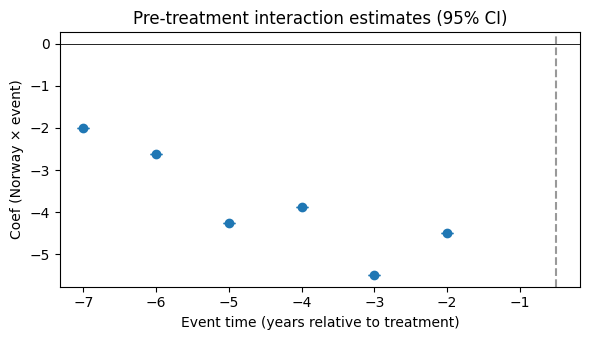

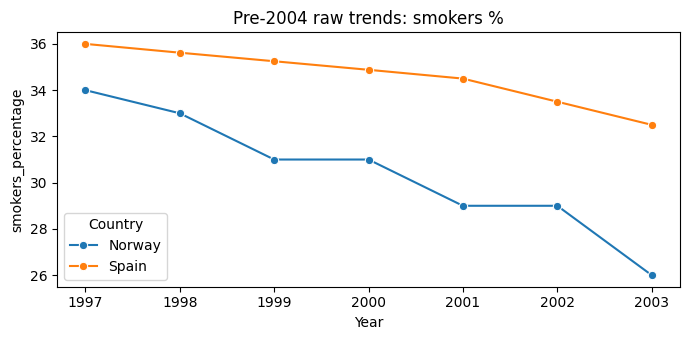

In [70]:
# ...existing code...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Summarize linear-trend test
try:
    lin_coef = lin_model.params.get('Norway_x_Year')
    lin_p = lin_model.pvalues.get('Norway_x_Year')
    print(f"Linear-trend test: Norway×Year coef = {lin_coef:.4f}, p-value = {lin_p:.4f}")
except Exception as e:
    print("Linear-trend results not available (run the pre-2004 test cell).")

# Summarize event-dummy pre joint test
try:
    # es_pre_model and int_cols were created in the pre-test cell
    # compute pre-treatment interaction columns and F-test
    pre_int_cols = [c for c in int_cols if int(c.split('_')[1]) < 0]
    if len(pre_int_cols) > 0:
        hyp = ", ".join([f"{c} = 0" for c in pre_int_cols])
        ftest = es_pre_model.f_test(hyp)
        print(f"\nEvent-dummy joint test (pre): F = {float(ftest.statistic):.3f}, p-value = {float(ftest.pvalue):.4f}")
    else:
        print("\nNo pre-treatment interaction columns to test (need >=1).")
except Exception:
    print("\nEvent-dummy joint test results not available (run the pre-2004 test cell).")

# Table of pre-treatment interaction estimates from the event-study (if available)
try:
    # get interaction cols from the full event-study model if needed
    ev_ints = [c for c in es_model.params.index if c.startswith('int_')]
    pre_ev_ints = [c for c in ev_ints if int(c.split('_')[1]) < 0]
    if pre_ev_ints:
        tbl = pd.DataFrame({
            'event_time': [int(c.split('_')[1]) for c in pre_ev_ints],
            'coef': es_model.params[pre_ev_ints].values,
            'se': es_model.bse[pre_ev_ints].values
        })
        tbl['ci_low'] = tbl['coef'] - 1.96 * tbl['se']
        tbl['ci_high'] = tbl['coef'] + 1.96 * tbl['se']
        tbl = tbl.sort_values('event_time').reset_index(drop=True)
        print("\nPre-treatment interaction estimates (Norway × event_time):")
        print(tbl.to_string(index=False, formatters={'coef':'{:.4f}'.format,'se':'{:.4f}'.format,'ci_low':'{:.4f}'.format,'ci_high':'{:.4f}'.format}))
        # plot pre coefficients
        plt.figure(figsize=(6,3.5))
        plt.errorbar(tbl['event_time'], tbl['coef'], yerr=1.96*tbl['se'], fmt='o', capsize=4)
        plt.axhline(0, color='k', linewidth=0.6)
        plt.axvline(-0.5, color='0.6', linestyle='--')
        plt.xlabel('Event time (years relative to treatment)')
        plt.ylabel('Coef (Norway × event)')
        plt.title('Pre-treatment interaction estimates (95% CI)')
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo pre-treatment event-interaction coefficients available from es_model.")
except Exception:
    print("\nEvent-study results not available (run the event-study cell).")

# Quick visual of raw pre-2004 trends (Spain vs Norway)
try:
    treatment = 2004
    agg = df_long[df_long['Year'] < treatment].groupby(['Year','Country'])['smokers_percentage'].mean().reset_index()
    plt.figure(figsize=(7,3.5))
    sns.lineplot(data=agg, x='Year', y='smokers_percentage', hue='Country', marker='o')
    plt.title('Pre-2004 raw trends: smokers %')
    plt.tight_layout()
    plt.show()
except Exception:
    pass

# ...existing code...

In [74]:
import statsmodels.api as sm

X = reg_df[['Norway', 'Post2004', 'Treated', 'tobacco_price']]
X = sm.add_constant(X)
y = reg_df['smokers_percentage']

# Clustered SEs by country (since treatment varies at country level)
model_clustered = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': reg_df['Country']})
print(model_clustered.summary())

did_coef = model_clustered.params['Treated']
did_p = model_clustered.pvalues['Treated']
print(f"\nDiD estimate (Treated): {did_coef:.4f}, clustered p-value: {did_p:.4f}")


                            OLS Regression Results                            
Dep. Variable:     smokers_percentage   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     8.870
Date:                Wed, 29 Oct 2025   Prob (F-statistic):              0.206
Time:                        12:33:28   Log-Likelihood:                -24.269
No. Observations:                  28   AIC:                             58.54
Df Residuals:                      23   BIC:                             65.20
Df Model:                           4                                         
Covariance Type:              cluster                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            44.1952      0.756     58.426

/Users/ulrikhaugland/data_science_venv/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [75]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
bg_test = acorr_breusch_godfrey(model, nlags=4)
print(bg_test)



(np.float64(9.318713717921671), np.float64(0.05360855570074807), 2.49413064422161, 0.07564599504947155)


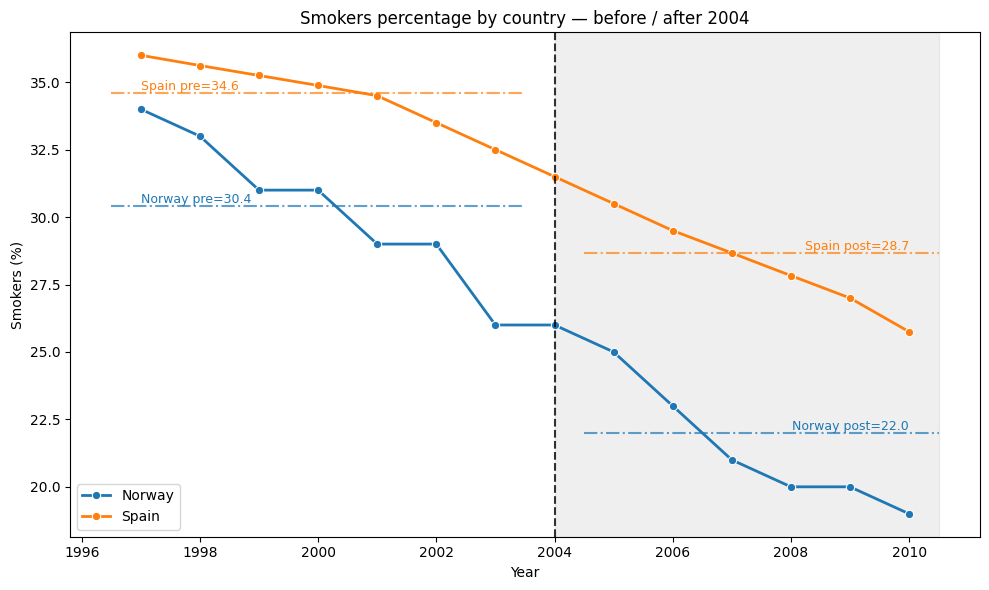

In [76]:
# copy into a new cell


# aggregate to ensure one value per Year x Country
agg = df_long.groupby(['Year', 'Country'])['smokers_percentage'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=agg, x='Year', y='smokers_percentage', hue='Country', marker='o', linewidth=2)

# treatment year line and shading
treatment = 2004
plt.axvline(treatment, color='k', linestyle='--', alpha=0.8)
plt.axvspan(treatment, agg['Year'].max() + 0.5, color='gray', alpha=0.12)

# plot pre/post horizontal means per country and annotate
palette = dict(zip(agg['Country'].unique(), sns.color_palette(n_colors=agg['Country'].nunique())))
for country, g in agg.groupby('Country'):
    pre_mean = g.loc[g['Year'] < treatment, 'smokers_percentage'].mean()
    post_mean = g.loc[g['Year'] >= treatment, 'smokers_percentage'].mean()
    # dashed lines for means
    plt.hlines(pre_mean, xmin=g['Year'].min()-0.5, xmax=treatment-0.5,
               colors=palette[country], linestyles='dashdot', alpha=0.7)
    plt.hlines(post_mean, xmin=treatment+0.5, xmax=g['Year'].max()+0.5,
               colors=palette[country], linestyles='dashdot', alpha=0.7)
    # text labels
    if not np.isnan(pre_mean):
        plt.text(g['Year'].min(), pre_mean, f'{country} pre={pre_mean:.1f}', color=palette[country], va='bottom', fontsize=9)
    if not np.isnan(post_mean):
        plt.text(g['Year'].max(), post_mean, f'{country} post={post_mean:.1f}', color=palette[country], va='bottom', ha='right', fontsize=9)

plt.xlabel('Year')
plt.ylabel('Smokers (%)')
plt.title('Smokers percentage by country — before / after 2004')
plt.legend()
plt.tight_layout()
plt.show()